# IOGS - Machine learning and pattern recognition

## Class objective

The objective of this class is to build from scratch a convolutional neural network (CNN) using PyToch framework.

To make the optimization efficient, will work with the GPU acceleration provided by Colab.
To set the GPU acceleration:
* Edit
* Notebook settings
* Hardware accelerator: **GPU**


In [1]:
USE_COLAB = False # define a variable, on colab or not (should be set to True on Colab)

 ## Package installation and imports
 
As in the provious class, we need to install Pytorch (if it is already installed, it won't be a second time)

In [2]:
if USE_COLAB:
    # download and install Pytorch
    !pip install torch torchvision

We also need several inports from different libraries

In [3]:
from tqdm import tqdm # for progress bars
from sklearn.metrics import confusion_matrix
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

# Pytorch
import torch # deep learning framework
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn

## Get the data

We will use the CIFAR10 dataset for image classification. It is one of the most used classification dataset for first experiences.
It is composed of 60000 images (50000 for training, 10000 for testing).

### Defining the directory to store data

When using Colab, the data is stored in the drive. The first thing to do is to mount the drive as a folder for the notebook.
*note*: if not using Colab, we set the default download dir in the current directory

In [4]:
if USE_COLAB:
    # mount the goole drive
    from google.colab import drive
    drive.mount('/content/drive')
    # download cifar on GoogleDrive
    data_dir = "/content/drive/My Drive/dataset/cifar"
else:
    data_dir = "./cifar"

### Dataloaders

PyTorch and TorchVision offer classes for an easy data usage.

The Dataset class, allow to apply data transformation such as normalization or data augmentation.

For the CIFAR10 dataset, a specific dataset class is coded.
It will download the data if needed.

In [5]:
# transformations for images (convert to pytorch tensor and center data)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# create the train dataset and test dataset
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root=data_dir, train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


The datasets are then used in dataloaders.
The dataloaders are multithreaded and create the batches of data used for optimization at the given batch size.
They can shuffle the data, if specified.

In [6]:
BATCH_SIZE = 16

# build dataset for cifar 10
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

## Classes

CIFAR10 as 10 classes for classifications.

In [7]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Network definition

The state of the art for image classification is convolutional neural networks (CNN).
These CNNs have become more and more complex and involve today a high number of convolutional layers.
In this class to keep the optimization possible in the time of the class, we will use a very simple network based on LeNet-5.

<font color='red'>Question</font> Create a network with 3 convolutions and 2 linear layers.

The network will be:
```
conv (3 -> 16, kernel 3x3)
relu 
max_pooling
conv (16 -> 32, kernel 3x3)
relu 
max_pooling
conv (32 -> 64, kernel 3x3)
relu 
max_pooling
Linear (256 -> 128)
relu
Linear (128 -> 10)
```
In the ```__init__``` function, you need to declare the layers with parameters (convolutional and linear layers).
In the ```forward``` function, you describe the information flow from the input (x) to the final output.

The object with parameters are:
* ```nn.Conv2d(a,b,c)``` where ```a``` is the input channel number, ```b``` the output channel number and ```c``` the kernel size.
* ```nn.Linear(a,b)``` where ```a``` is the input size, ```b``` the output size

Here are some useful functions:
* ```F.relu(a)```: apply a relu on ```a```
* ```F.max_pool2d(a,2)```: apply a max pooling of size 2 on ```a```
* ```b = a.view(a.size(0), -1)```: flattens ```a``` to be usable with linear layer (shoud be used between 2d operations and 1d operations)

In [8]:
# network class
class SimpleCNN(nn.Module):
  
  def __init__(self):
    super(SimpleCNN, self).__init__()
    
    # define here the convolutions and linear layers
    # self.conv1 = ....
    self.conv1 = nn.Conv2d(3, 16, 3)
    self.conv2 = nn.Conv2d(16, 32, 3)
    self.conv3 = nn.Conv2d(32, 64, 3)
    self.fc1 = nn.Linear(64*2*2,128)
    self.fc2 = nn.Linear(128, 10)
    
  def forward(self, x):
    
    # define here the forward pass
    # x_cv1 = ...
    
    # convolution stage 1
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    
    # convolution stage 2
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2)
    
    # convolution stage 3
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2)
    
    # fully convolutional part
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    
    return x

## Metrics

In this practical session, we will only use the global accuracy, defined by the number of correctly classified elements over the total number of sample.

<font color='red'>Question</font>: define the accuracy function, from a confusion matrix.

In [9]:
def accuracy(cm):
    return cm.trace() / cm.sum()

## Main optimization loop

This is the main loop for optimization.
It follows the same principles as the MLP of the previous class.

#### Train

<font color='red'>Question</font>: Set the gradients to zero

<font color='red'>Question</font>: Compute the outputs

<font color='red'>Question</font>: Compute the cross entropy loss

<font color='red'>Question</font>: Call backward on the loss

<font color='red'>Question</font>: Call step on the optimizer

<font color='red'>Question</font>: Compute the predictions on the outputs (in numpy format), it is the argmax of the prediction vector

<font color='red'>Question</font>: Update the confusion matrix

#### Test
<font color='red'>Question</font>: Compute the outputs

<font color='red'>Question</font>: Compute the predictions on the outputs (in numpy format), it is the argmax of the prediction vector

<font color='red'>Question</font>: Update the confusion matrix

#### Display results
<font color='red'>Question</font>: Compute train and test accuracies, display them

<font color='red'>Question</font>: Save these accuracy in the corresponding lists

In [10]:
# create the network
network = SimpleCNN()
network.cuda()
  
# create an optimizer
optimizer = torch.optim.Adam(network.parameters(), lr=1e-4)

max_epoch = 10

# list for saving accuracies
train_accs = []
test_accs = []

# iterate over epochs
for epoch in range(max_epoch):
    
    # set the network in train mode
    network.train()
    
    # create a zero confuction matrix
    cm = np.zeros((10,10))
    
    for inputs, targets in tqdm(trainloader, ncols=80, desc="Epoch {}".format(epoch)):

        inputs = inputs.cuda()
        targets = targets.cuda()

        # gradients to zero
        optimizer.zero_grad()
        
        # compute outputs
        # outputs = ...
        outputs = network(inputs)
        
        # compute loss
        loss = F.cross_entropy(outputs, targets)
        
        # backward on loss
        loss.backward()
        
        # optimizer step
        optimizer.step()

        # convert the torch tensors to numpy
        outputs_np = outputs.cpu().detach().numpy()
        targets_np = targets.cpu().detach().numpy()
        
        # compute the predictions
        predictions = np.argmax(outputs_np, axis=1)
        
        # update the confusion matrix
        cm += confusion_matrix(targets_np.ravel(), predictions.ravel(), labels=range(len(classes)))

    # set the network to evaluatio mode
    network.eval()
    
    # create the confusion matrix
    cm_test = np.zeros((10,10))
    # tell not to reserve memory space for gradients (much faster)
    with torch.no_grad():
        for inputs, targets in tqdm(testloader, ncols=80, desc=" Test {}".format(epoch)):

            inputs = inputs.cuda()
            targets = targets.cuda()

            # compute outputs
            outputs = network(inputs)

            outputs_np = outputs.cpu().detach().numpy()
            targets_np = targets.cpu().detach().numpy()
            
            # compute predictions
            predictions = np.argmax(outputs_np, axis=1)
            
            # compute confusion matrix
            cm_test += confusion_matrix(targets_np.ravel(), predictions.ravel(), labels=range(len(classes)))

    clear_output()
    oa_train = accuracy(cm)
    oa_test = accuracy(cm_test)

    print("\n OA train {} | OA test {}".format(oa_train, oa_test))
    print("")
    
    train_accs.append(oa_train)
    test_accs.append(oa_test)

print("Train accuracies")
print(train_accs)
print("Test accuracies")
print(test_accs)



 OA train 0.60308 | OA test 0.5946

Train accuracies
[0.3292, 0.4251, 0.46258, 0.49554, 0.52004, 0.54182, 0.5619, 0.57866, 0.5927, 0.60308]
Test accuracies
[0.3965, 0.4544, 0.4892, 0.5122, 0.5362, 0.5365, 0.554, 0.5491, 0.5817, 0.5946]


### Analysis

<font color='red'>Question</font>: copy paste the accuracy list in new variables (to save the results)
<font color='red'>Question</font>: display the training and testing curves

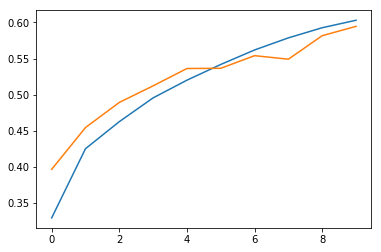

In [12]:
# display the curves
train_curve = [0.3292, 0.4251, 0.46258, 0.49554, 0.52004, 0.54182, 0.5619, 0.57866, 0.5927, 0.60308]
test_curve = [0.3965, 0.4544, 0.4892, 0.5122, 0.5362, 0.5365, 0.554, 0.5491, 0.5817, 0.5946]
plt.plot(train_curve)
plt.plot(test_curve)

### Improvements

In this part, the objective is play with the network to improve the results.
You can add more convolutional layers, batchnorm, train for longer...

<font color='red'>Question</font>: each time you do a modification, save the results along with the previous results and display the curves.

**Note**: the state of the art on this dataset is around 95% for the test. Reaching that is difficult and would require training for a long time, but you can try to get as close as possible !